# Section 1: Business understanding
## Project start business in Seattle with AirBNB

Novadays, AirBNB service is full of good offers for travelers. But my customer has several properties in Seattle, and she is going to start business as well. So, she asked me to complete preliminary analysis of the market in Seattle. She asked me questions:

### Q1: What is the price should I set for my property?

### Q2: What kind of amenities shall I include in my property and how they affect price?

### Q3: How 'cleaning fee' depends on object size and price?

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy import stats

In [255]:
listings = pd.read_csv("listings.csv")
listings.shape

(3818, 92)

# Section 2: Data understanding

In [256]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [257]:
# convert price from string to int. This action is required to drop ',' and '$'

listings.price = listings.price[listings.price.notna()].str.replace(',', '').str.replace('$', '').astype(float)

"""
listings.review_scores_rating = listings.review_scores_rating.fillna(listings.review_scores_rating[listings.review_scores_rating.notna()].mean())
listings.review_scores_accuracy = listings.review_scores_accuracy.fillna(listings.review_scores_accuracy[listings.review_scores_accuracy.notna()].mean())
listings.review_scores_cleanliness = listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness[listings.review_scores_cleanliness.notna()].mean())
listings.review_scores_location = listings.review_scores_location.fillna(listings.review_scores_location[listings.review_scores_location.notna()].mean())
listings.review_scores_value = listings.review_scores_value.fillna(listings.review_scores_value[listings.review_scores_value.notna()].mean())
listings.reviews_per_month = listings.reviews_per_month.fillna(listings.reviews_per_month[listings.reviews_per_month.notna()].mean())
"""

'\nlistings.review_scores_rating = listings.review_scores_rating.fillna(listings.review_scores_rating[listings.review_scores_rating.notna()].mean())\nlistings.review_scores_accuracy = listings.review_scores_accuracy.fillna(listings.review_scores_accuracy[listings.review_scores_accuracy.notna()].mean())\nlistings.review_scores_cleanliness = listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness[listings.review_scores_cleanliness.notna()].mean())\nlistings.review_scores_location = listings.review_scores_location.fillna(listings.review_scores_location[listings.review_scores_location.notna()].mean())\nlistings.review_scores_value = listings.review_scores_value.fillna(listings.review_scores_value[listings.review_scores_value.notna()].mean())\nlistings.reviews_per_month = listings.reviews_per_month.fillna(listings.reviews_per_month[listings.reviews_per_month.notna()].mean())\n'

Text(0,0.5,'Qty')

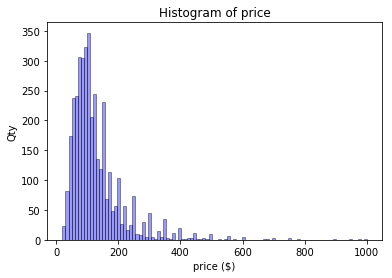

In [258]:
sns.distplot(listings['price'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of price')
plt.xlabel('price ($)')
plt.ylabel('Qty')

In [259]:
# With price prediction it is important to drop outliers in predicting parameter
listings.drop(listings[listings['price'] > 400].index, inplace=True)
listings.reset_index(drop=True, inplace=True)
listings.shape

(3755, 92)

In [260]:
# Drop columns with single value
def drop_single_value_columns(df):
    """ Function to drop columns with single value """
    df_col = df.columns
    df_col_drop = []
    for col in df_col:
        if len(df[col].value_counts()) == 1:
            df_col_drop.append(col)
    df.drop(columns=df_col_drop, inplace=True)

drop_single_value_columns(listings)

In [261]:
# This parameters do not affect price (0 - 0.02)
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: 1 if (x == 't') else 0)
listings.is_location_exact = listings.is_location_exact.apply(lambda x: 1 if (x == 't') else 0)
listings.host_identity_verified = listings.host_identity_verified.apply(lambda x: 1 if (x == 't') else 0)

listings.instant_bookable = listings.instant_bookable.apply(lambda x: 1 if (x == 't') else 0)
listings.require_guest_profile_picture = listings.require_guest_profile_picture.apply(lambda x: 1 if (x == 't') else 0)
listings.require_guest_phone_verification = listings.require_guest_phone_verification.apply(lambda x: 1 if (x == 't') else 0)

# This parameter does not affect price(0.00)
listings.zipcode.loc[listings.zipcode == '99\n98122'] = 98122
listings.zipcode.dropna(inplace=True)
listings.zipcode = listings.zipcode.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [262]:
"""listings.loc[listings['cancellation_policy'] == 'strict', 'cancellation_policy'] = 3
listings.loc[listings['cancellation_policy'] == 'moderate', 'cancellation_policy'] = 1
listings.loc[listings['cancellation_policy'] == 'flexible', 'cancellation_policy'] = 2
listings['cancellation_policy'].astype(int, inplace=True)

listings.loc[listings['room_type'] == 'Shared room', 'room_type'] = 1
listings.loc[listings['room_type'] == 'Private room', 'room_type'] = 2
listings.loc[listings['room_type'] == 'Entire home/apt', 'room_type'] = 3
listings['room_type'].astype(int, inplace=True)

listings.loc[listings['bed_type'] == 'Airbed', 'bed_type'] = 1
listings.loc[listings['bed_type'] == 'Futon', 'bed_type'] = 2
listings.loc[listings['bed_type'] == 'Couch', 'bed_type'] = 1
listings.loc[listings['bed_type'] == 'Pull-out Sofa', 'bed_type'] = 2
listings.loc[listings['bed_type'] == 'Real Bed', 'bed_type'] = 3

listings['bed_type'].astype(int, inplace=True)
listings.shape
"""

"listings.loc[listings['cancellation_policy'] == 'strict', 'cancellation_policy'] = 3\nlistings.loc[listings['cancellation_policy'] == 'moderate', 'cancellation_policy'] = 1\nlistings.loc[listings['cancellation_policy'] == 'flexible', 'cancellation_policy'] = 2\nlistings['cancellation_policy'].astype(int, inplace=True)\n\nlistings.loc[listings['room_type'] == 'Shared room', 'room_type'] = 1\nlistings.loc[listings['room_type'] == 'Private room', 'room_type'] = 2\nlistings.loc[listings['room_type'] == 'Entire home/apt', 'room_type'] = 3\nlistings['room_type'].astype(int, inplace=True)\n\nlistings.loc[listings['bed_type'] == 'Airbed', 'bed_type'] = 1\nlistings.loc[listings['bed_type'] == 'Futon', 'bed_type'] = 2\nlistings.loc[listings['bed_type'] == 'Couch', 'bed_type'] = 1\nlistings.loc[listings['bed_type'] == 'Pull-out Sofa', 'bed_type'] = 2\nlistings.loc[listings['bed_type'] == 'Real Bed', 'bed_type'] = 3\n\nlistings['bed_type'].astype(int, inplace=True)\nlistings.shape\n"

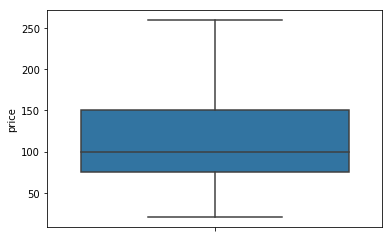

In [263]:
sns.boxplot(y='price', data=listings, showfliers=False)

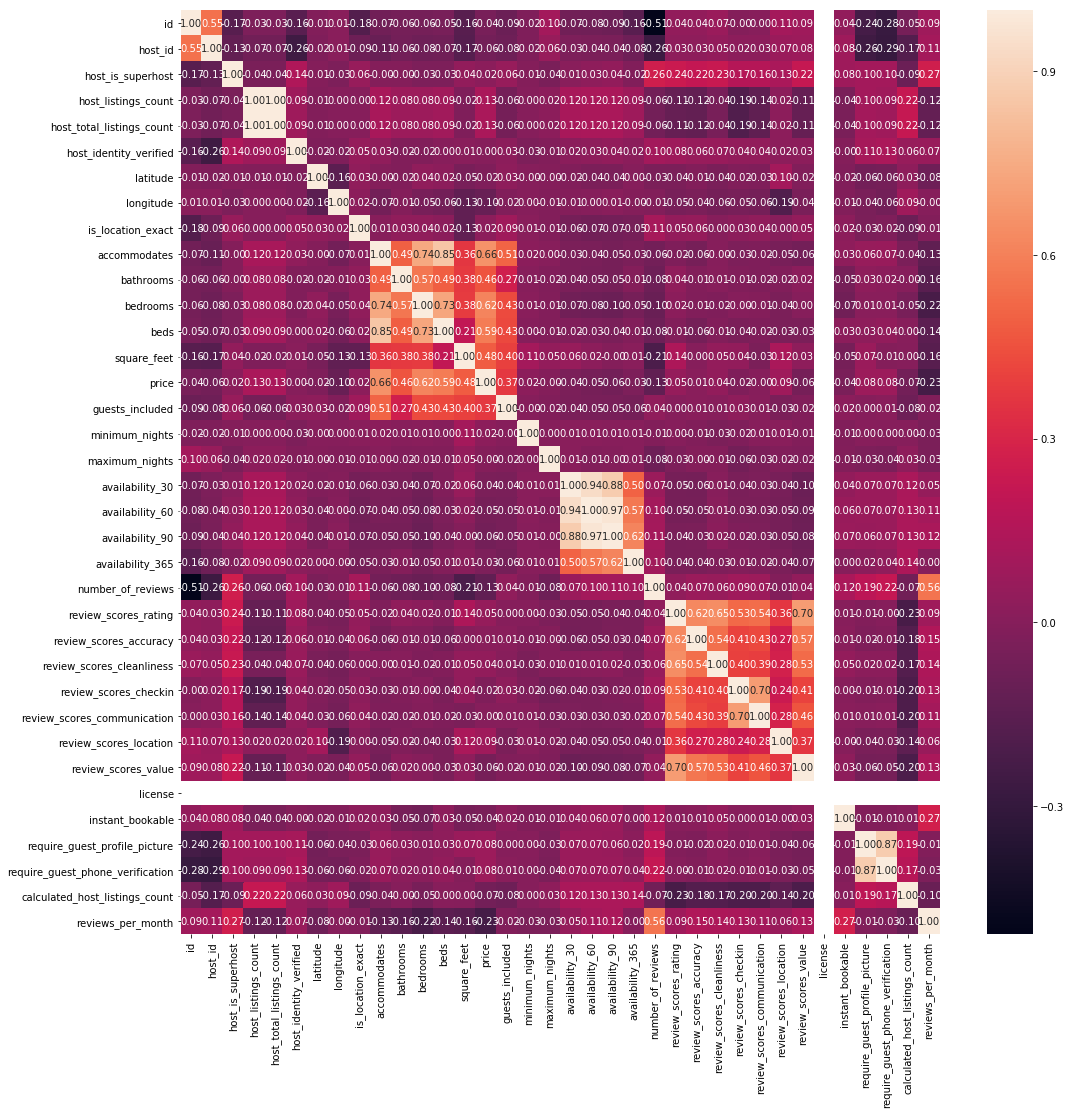

In [264]:
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(listings.corr(), annot=True, fmt=".2f");

In [265]:
listings.drop(columns=['host_listings_count', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                                  'listing_url', 'name', 'summary', 'description', 'space', 'neighborhood_overview', 'notes', 'transit',
                                  'host_thumbnail_url', 'host_picture_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'host_since', 'host_neighbourhood', 'weekly_price', 'square_feet', 'host_about',
                                  'monthly_price', 'first_review', 'last_review', 'host_url', 'host_name', 'host_location',
                                  'host_has_profile_pic', 'city', 'state', 'host_verifications', 'street', 'calendar_updated',
                                  'extra_people', 'smart_location', 'neighbourhood', 'neighbourhood_group_cleansed', 'require_guest_phone_verification',
                                  'number_of_reviews', 'reviews_per_month', 'require_guest_profile_picture', 'cleaning_fee',
                                  'security_deposit', 'host_id', 'availability_90', 'availability_60', 'review_scores_value',
                                  'availability_30', 'host_is_superhost', 'availability_365', 'host_identity_verified',
                                  'instant_bookable', 'license', 'minimum_nights', 'maximum_nights', 'calculated_host_listings_count',
                                  'review_scores_rating', 'calculated_host_listings_count', 'is_location_exact', 'review_scores_accuracy',
                                  'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_location',
                                  'host_total_listings_count', 'id', 'longitude', 'latitude', 'zipcode'
                      ], inplace=True)

In [266]:
c = listings.corr().abs()
s = c.unstack()
r = s.loc['price'].sort_values(ascending=False)#[10:]
r

price              1.000000
accommodates       0.661923
bedrooms           0.616286
beds               0.585837
bathrooms          0.460362
guests_included    0.371140
dtype: float64

In [267]:
col_num = listings.select_dtypes(include=np.number).columns.tolist()

col_for_price = list(r.index)
listings_col_drop = set(col_num) - set(col_for_price)

In [268]:
# Correct outliers, which looks like mistakes 
listings.loc[(listings.price < 100) & (listings.beds > 5), 'beds'] = 1
listings.loc[(listings.price < 150) & (listings.bathrooms > 3), 'bathrooms'] = 1
listings.loc[(listings.price < 100) & (listings.guests_included > 5), 'guests_included'] = 1

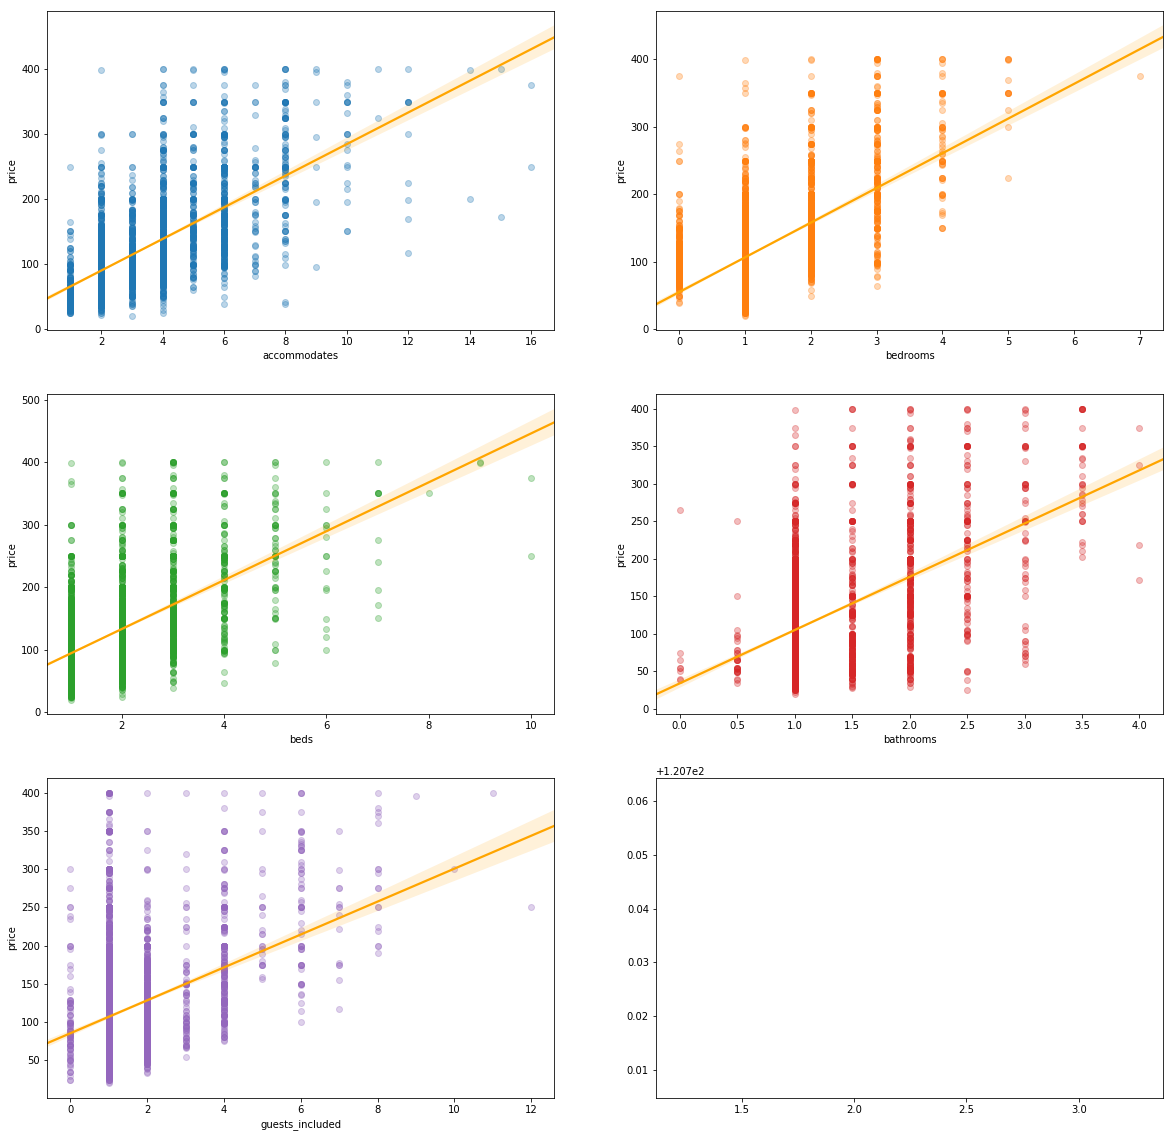

In [269]:
col = 2
rows = math.ceil(len(col_for_price) / col)

fig, ax = plt.subplots(rows, col, figsize=(20, 20))

r = 0
c = 0
for item in col_for_price[1:]: 
    sns.regplot(x=item, y='price', data=listings, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[c, r])
    r += 1
    cr = r / col
    if cr.is_integer():
        c += 1
        r = 0

In [270]:
listings.drop(columns=listings_col_drop, inplace=True)

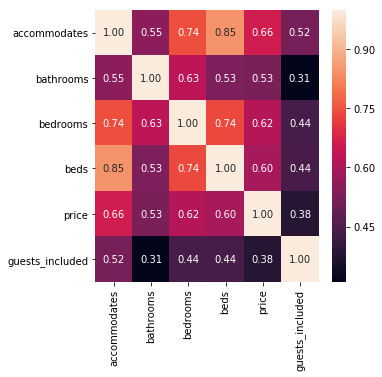

In [271]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(listings.corr(), annot=True, fmt=".2f");

In [272]:
listings_col = list(listings.columns)
listings.isna().sum()

neighbourhood_cleansed     0
property_type              1
room_type                  0
accommodates               0
bathrooms                 16
bedrooms                   6
beds                       1
bed_type                   0
amenities                  0
price                      0
guests_included            0
cancellation_policy        0
dtype: int64

In [273]:
listings.dropna(inplace=True)

In [274]:
listings.shape

(3732, 12)

In [275]:
listings_col.remove('price')

In [276]:
property_type_counts = listings.property_type.value_counts()

for index, count in property_type_counts.items():
    if count < 100:
        listings.drop(listings[listings['property_type'] == index].index, inplace=True)
        print(index)

Condominium
Loft
Bed & Breakfast
Other
Cabin
Bungalow
Camper/RV
Boat
Tent
Treehouse
Dorm
Chalet
Yurt


# Section 4: Modeling

### Q1: What is the price should I set for my property?

In [277]:
col_num = listings.select_dtypes(include=np.number).columns.tolist()
col_str = list(listings.columns)

for col in listings.columns:
    if col in col_num:
          col_str.remove(col)

In [278]:
y = listings.price
X = listings.drop(columns=['price', 'amenities'])

col_str.remove('amenities')

X = pd.get_dummies(data=X, columns=col_str, drop_first=True)

X_norm = scale(X)

In [279]:
random_state = random.randint(0, 50) # I set random state as variable in order to sync two models accuracy

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.30, random_state=random_state)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_pred))

0.648189161861
0.625266508936


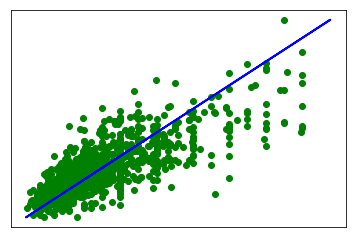

In [280]:
plt.scatter(y_test, y_pred,  color='green')
plt.plot(y_pred, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

### Q2.1: What kind of amenities shall I include in my property?

In [281]:
# render column amenities to separate columns in order to improve predict precision
amenities = set()
listings.reset_index(drop=True, inplace=True)

for row in range(0, listings.shape[0]):
    amenities_row = list(listings['amenities'][row].strip('{}').split(','))
    for item in amenities_row:
        amenities.add(item)

for item in amenities:
    listings[item] = 0
    listings.loc[listings.amenities.map(set(item).issubset), item] = 1

listings.drop(columns='')
amenities_vs_price = listings  #I create another dataset for another question

amenities_correlation = listings

amenities.remove('')
    
listings.describe()

,accommodates,bathrooms,bedrooms,beds,price,guests_included,,"""Other pet(s)""",TV,Essentials,...,"""Family/Kid Friendly""","""Smoking Allowed""","""Wheelchair Accessible""",Breakfast,"""Suitable for Events""",Shampoo,"""24-Hour Check-in""","""Elevator in Building""","""Safety Card""","""Laptop Friendly Workspace"""
count,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.0,3482.000000,3482.000000,3482.000000,...,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,3.305859,1.228461,1.292935,1.701034,120.853245,1.654509,1.0,0.012636,0.717978,0.922458,...,0.555428,0.123779,0.531591,0.131246,0.141011,0.792361,0.159104,0.226307,0.252441,0.202183
std,1.895372,0.512837,0.837433,1.064398,69.160132,1.245431,0.0,0.111715,0.450049,0.267487,...,0.496990,0.329377,0.499073,0.337718,0.348083,0.405675,0.365826,0.418500,0.434475,0.401685
min,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,1.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,16.000000,4.000000,7.000000,10.000000,400.000000,12.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [282]:
listings = listings.drop(columns='amenities')
listings_col.remove('amenities')

In [283]:
"""
amenities_correlation = amenities_correlation.loc[amenities_correlation.room_type == 3]
amenities_correlation = amenities_correlation.loc[amenities_correlation.neighbourhood_group_cleansed == 'Downtown']
amenities_correlation = amenities_correlation.loc[amenities_correlation.property_type == 'Apartment']
amenities_correlation = amenities_correlation.loc[amenities_correlation.cancellation_policy == 1]
"""

amenities_correlation = amenities_correlation.drop(columns=listings_col)
amenities_correlation = amenities_correlation.drop(columns='')
amenities_correlation.describe()

,price,"""Other pet(s)""",TV,Essentials,"""First Aid Kit""","""Air Conditioning""",Dog(s),"""Smoke Detector""",Dryer,Pool,...,"""Family/Kid Friendly""","""Smoking Allowed""","""Wheelchair Accessible""",Breakfast,"""Suitable for Events""",Shampoo,"""24-Hour Check-in""","""Elevator in Building""","""Safety Card""","""Laptop Friendly Workspace"""
count,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,...,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,120.853245,0.012636,0.717978,0.922458,0.587019,0.555428,0.206778,0.897473,0.918150,0.668581,...,0.555428,0.123779,0.531591,0.131246,0.141011,0.792361,0.159104,0.226307,0.252441,0.202183
std,69.160132,0.111715,0.450049,0.267487,0.492440,0.496990,0.405053,0.303384,0.274175,0.470791,...,0.496990,0.329377,0.499073,0.337718,0.348083,0.405675,0.365826,0.418500,0.434475,0.401685
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


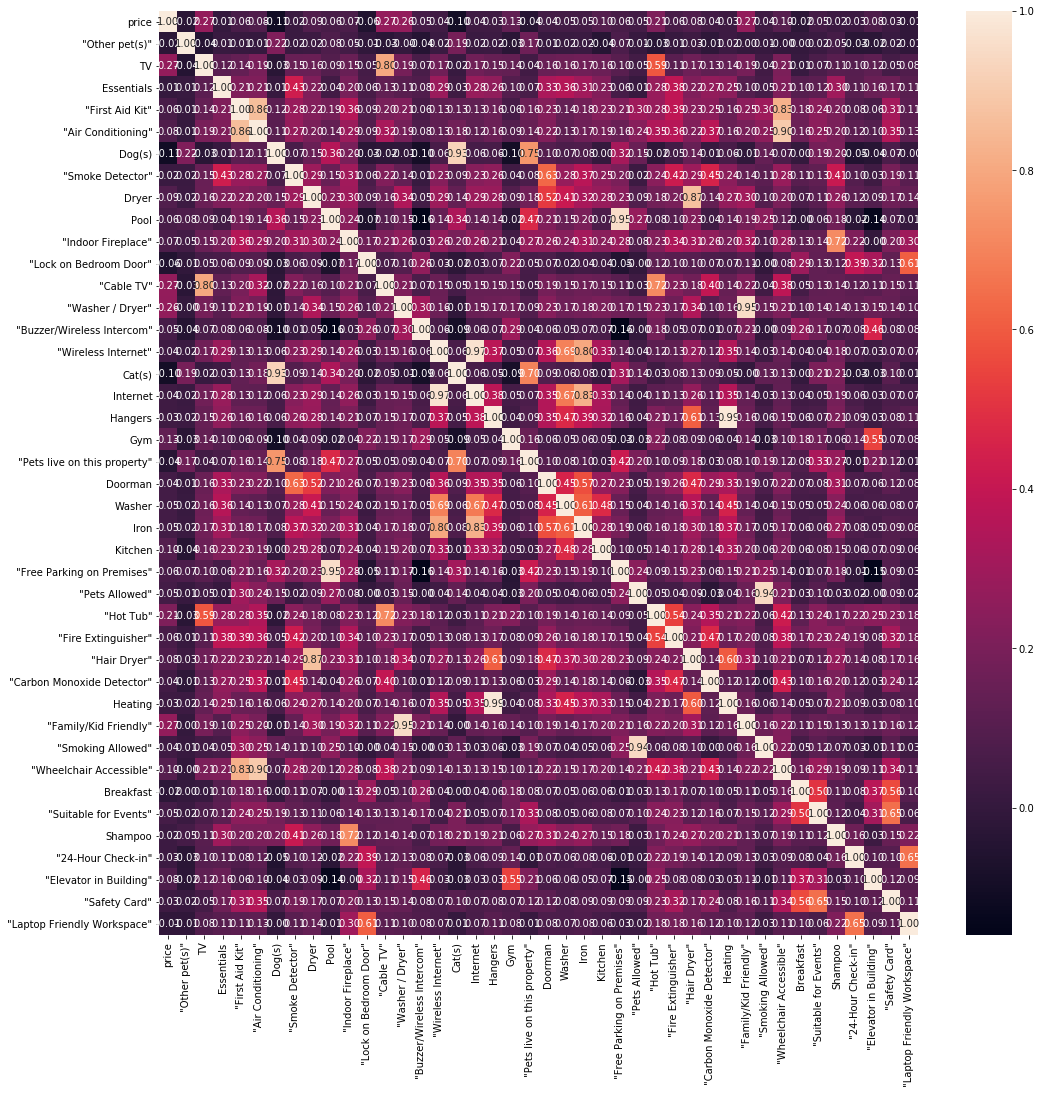

In [284]:
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(amenities_correlation.corr(), annot=True, fmt=".2f");

Some amenities clearly corelates to each other. For example pool and Hair Drier or Internet and Iron

###  Q2.2 How amenities affect price?

In [285]:
# based on my analysis in plot below, I decided to drop this columns with NO CORRELATION to price
amenities_correlation = amenities_correlation.drop(columns=['"Air Conditioning"', '"Wheelchair Accessible"', '"Pets live on this property"'
                                   ,'"Safety Card"', '"Elevator in Building"', 'Gym', '"First Aid Kit"', '"24-Hour Check-in"'
                                   ])

# based on my analysis in plot below, I decided to drop this columns with MEDIUM CORRELATION to price
amenities_correlation = amenities_correlation.drop(columns=['"Hot Tub"', '"Suitable for Events"', '"Carbon Monoxide Detector"', '"Smoking Allowed"'
                                   ,'Shampoo', 'Essentials', '"Smoke Detector"', 'Breakfast', '"Fire Extinguisher"'
                                   ,'"Laptop Friendly Workspace"', '"Indoor Fireplace"', '"Washer / Dryer"', '"Family/Kid Friendly"'
                                   ,'"Pets Allowed"', 'Pool', '"Free Parking on Premises"', '"Buzzer/Wireless Intercom"'
                                    ,'"Cable TV"', 'TV', 'Dog(s)', 'Cat(s)', '"Hair Dryer"', '"Lock on Bedroom Door"'
                                   ])

In [286]:
c = amenities_correlation.corr().abs()
s = c.unstack()
r = s.loc['price'].sort_values(ascending=False)#[7:]

In [287]:
amenities_for_price = list(r.index)
amenities_for_price

['price',
 'Kitchen',
 'Dryer',
 'Iron',
 'Washer',
 'Doorman',
 '"Wireless Internet"',
 'Internet',
 'Hangers',
 'Heating',
 '"Other pet(s)"']

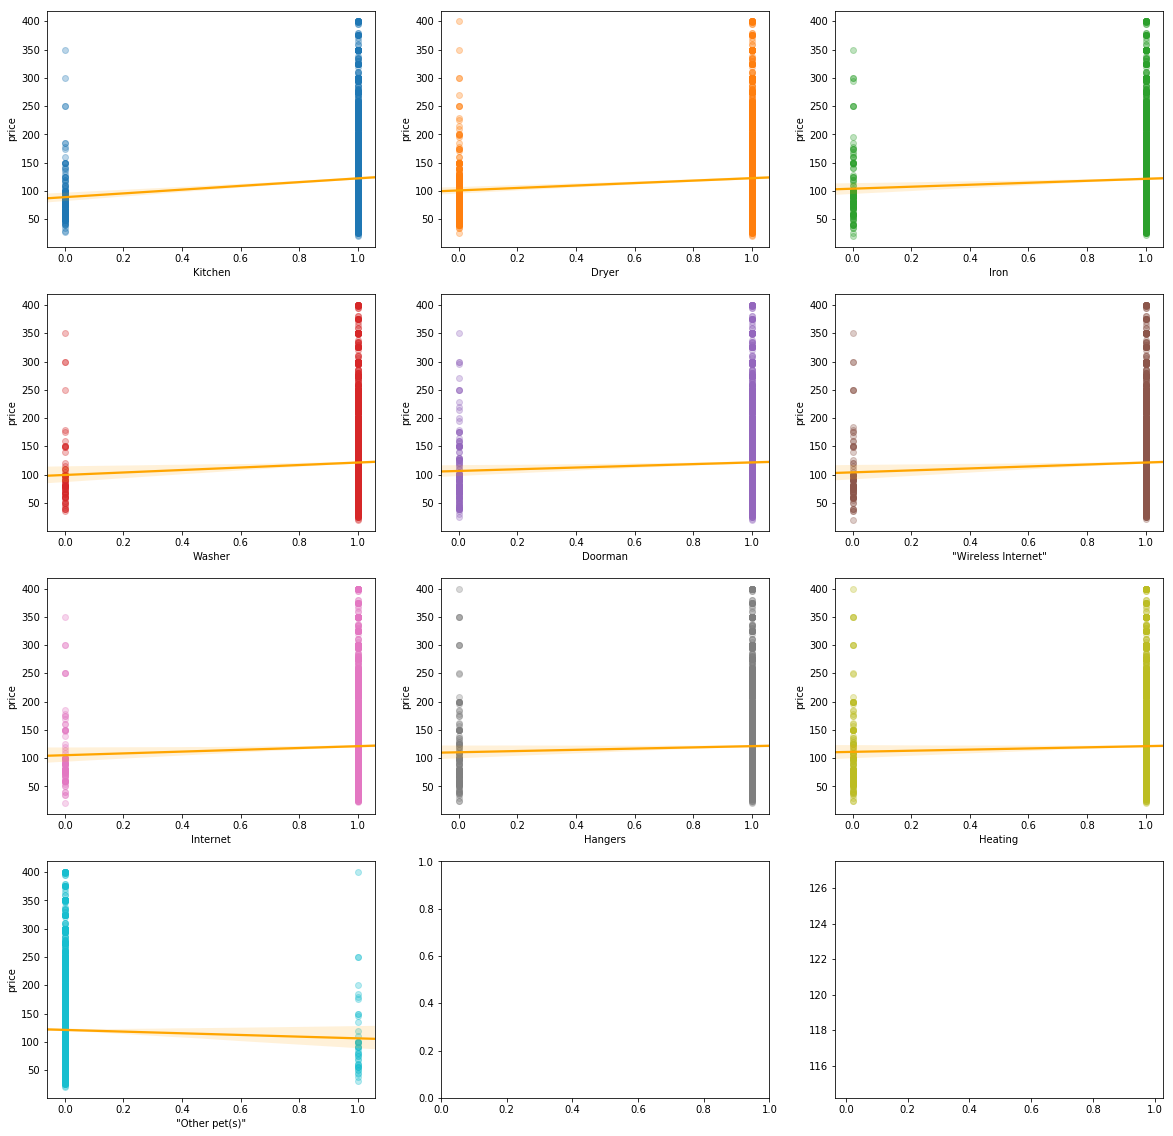

In [288]:
col = 3
rows = math.ceil(len(amenities_for_price) / col)

fig, ax = plt.subplots(rows, col, figsize=(20, 20))

r = 0
c = 0
for item in amenities_for_price[1:]: 
    sns.regplot(x=item, y='price', data=listings, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[c, r])
    r += 1
    cr = r / col
    if cr.is_integer():
        c += 1
        r = 0

In [289]:
amenities_col_drop = set(amenities) - set(amenities_for_price)

In [290]:
listings.shape

(3482, 53)

In [291]:
y = listings.price
X = listings.drop(columns=['price'])
X.drop(columns=amenities_col_drop, inplace=True)

In [292]:
X = pd.get_dummies(data=X, columns=col_str, drop_first=True)

In [293]:
X_norm = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.30, random_state=random_state)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_pred))

0.649228269414
0.62281682534


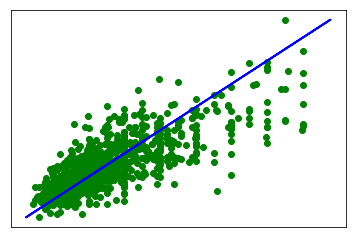

In [294]:
plt.scatter(y_test, y_pred,  color='green')
plt.plot(y_pred, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

I have added amenities that look the most interesting for modeling, but they did not improve score. Actually, the score decreased slightly.

In [295]:
"""#According to EmploymentStatus, which group has the highest average job satisfaction?

df2 = pd.DataFrame(columns=['min', 'max', 'mean', 'std'])

amenities = set(amenities_vs_price)

for item in amenities:
    df2.loc[item, 'min'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].min()
    df2.loc[item, 'max'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].max()
    df2.loc[item, 'mean'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].mean()
    df2.loc[item, 'std'] = amenities_vs_price['price'][amenities_vs_price[item] == 1].std()

print('The most expensive amenities based on STD price: ',list(df2.sort_values(by=['std'], ascending=False).index[0:5]))
"""
listings.shape

(3482, 53)

### Q3: How cleaning fee depends on object size and price?

In [296]:
listings3 = pd.read_csv("listings.csv")

listings3.price = listings3.price[listings3.price.notna()].str.replace(',', '').str.replace('$', '').astype(float)

listings3.cleaning_fee = listings3.cleaning_fee[listings3.cleaning_fee.notna()].str.replace('$', '').astype(float)
listings3.cleaning_fee = listings3.cleaning_fee.fillna(listings3.cleaning_fee[listings3.cleaning_fee.notna()].std())
"""
listings3.security_deposit = listings3.security_deposit[listings3.security_deposit.notna()].str.replace(',', '').str.replace('$', '').astype(float)
listings3.security_deposit = listings3.security_deposit.fillna(listings3.security_deposit[listings3.security_deposit.notna()].std())
"""

"\nlistings3.security_deposit = listings3.security_deposit[listings3.security_deposit.notna()].str.replace(',', '').str.replace('$', '').astype(float)\nlistings3.security_deposit = listings3.security_deposit.fillna(listings3.security_deposit[listings3.security_deposit.notna()].std())\n"

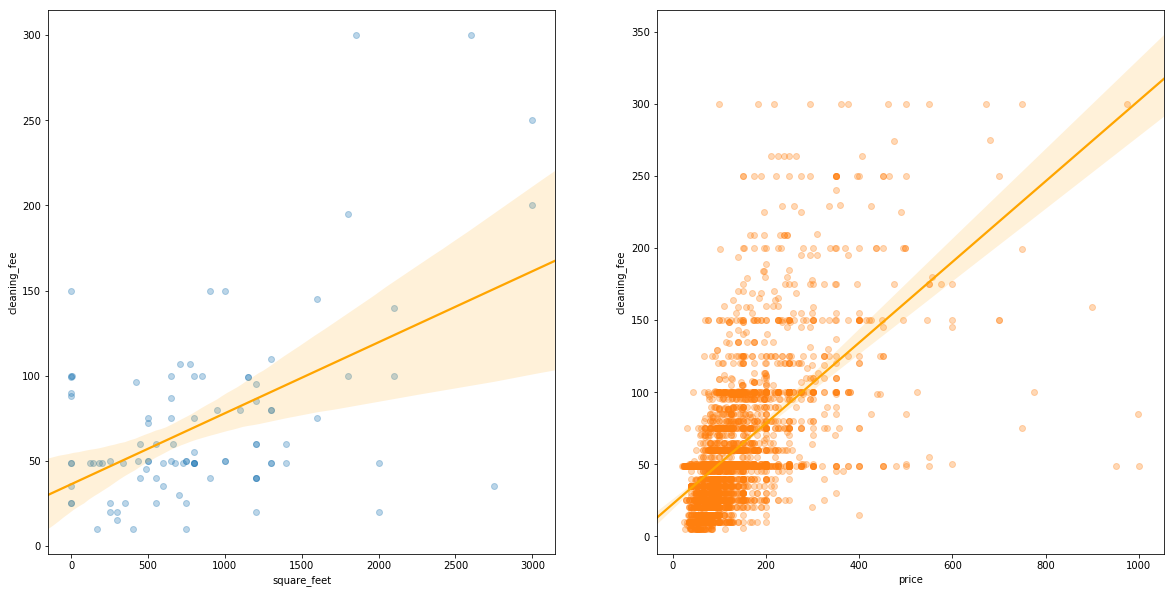

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.regplot(x='square_feet', y='cleaning_fee', data=listings3, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[0])
sns.regplot(x='price', y='cleaning_fee', data=listings3, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'}, ax=ax[1])

The plots show that cleaning_fee does not strongly depend on size or price. But there are still corelation is presented and as much your property expensive, the higher should be cleaning fee.